In [ ]:
import pandas as pd
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

In [ ]:
disasterTypes = ['drought', 'earthquakes', 'disasters', 'volcanic activity', 'floods', 'mass movements', 'storms', 'landslides', 'fog', 'wildfires', 'extreme temperatures', 'glacial lake outbursts']
disasterActions=["Number of deaths from", "Number of people affected from","Number of people left homeless from","Number of people left homeless from","Number of total people affected by", "Reconstruction costs from", "Insured damages against","Total economic damages from", "Death rates from", "Injury rates from" ]
df = pd.read_csv('/content/natural-disasters.csv')
df.head(2000)

,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,...,Total economic damages from landslides as a share of GDP,Total economic damages from mass movements as a share of GDP,Total economic damages from storms as a share of GDP,Total economic damages from volcanic activity as a share of GDP,Total economic damages from volcanic activity as a share of GDP.1,Entity,Year,deaths_rate_per_100k_storm,injured_rate_per_100k_storm,total_affected_rate_per_100k_all_disasters
0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,Afghanistan,1950,0.000000,0.000000,2.381236
1,0.0,0.0,4800.0,0,4800.0,0.0,0.0,20.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Afghanistan,1960,0.000000,0.000000,44.060951
2,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Afghanistan,1970,0.000000,0.000000,547.029875
3,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Afghanistan,1980,0.000000,0.000000,218.081859
4,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Afghanistan,1990,0.006322,0.000000,316.150814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Zimbabwe,1970,0.017477,0.000000,0.000000
1600,0.0,0.0,0.0,0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Zimbabwe,1980,0.000000,0.000000,0.000000
1601,0.0,0.0,505500.0,0,505500.0,0.0,0.0,5000.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Zimbabwe,1990,0.000000,0.000000,4839.765250
1602,0.0,0.0,810000.0,0,810000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.002268,0.0,0.0,Zimbabwe,2000,0.006677,0.000000,7023.254487


#Methods

In [ ]:

def getCountriesWithCoordinates():
    df = pd.read_csv(f'/content/countryCoords.csv')
    return df

def getStatisticsForDisaster(disasterName):
    columns = []
    extraColumns=["Entity","Year"]
    for col_name in df.columns:
        if disasterName.lower() in col_name.lower() or col_name in extraColumns:
            columns.append(col_name)
    #print(columns)
    return columns
def getCountries():
    countries = sorted(set(df['Entity']))
    for country in countries:
        #print(country)
        None
    return countries

def getYears():
    years = sorted(set(df['Year']))
    #print(len(years))
    return years

# Get all Disaster of the years for a country
def getAllDisastersForCountry(countries:[]):
    countries:[] = map(str.lower, countries)
    resultDf = df[df['Entity'].str.lower().isin(countries)]
    #resultDf.to_csv(f'./countryData.csv')
    #print(resultDf)
    return resultDf

def getAllDisastersForCountryAndYear(df,countries:[], year):
    countries:[] = map(str.lower, countries)
    resultDf = df[(df['Entity'].str.lower().isin(countries))&(df['Year']==year)]
    resultDf.to_csv(f'/content/countryData.csv')
    #print(resultDf)
    return resultDf

def getAllDisastersByYear(df,year:int):
    resultDf = df[df['Year'] == year]
    return resultDf

#Get Quartile Data

In [ ]:
def get_box_plot_data(boxplotDf):
    return boxplotDf.quantile([0.25,0.5,0.75])

#Get Country with Longitude and Latitude

In [ ]:
!pip install retrying


In [ ]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from retrying import retry

def writeCsvCountriesWithCoords():
    data = {'Country': getCountries()}
    countryDf = pd.DataFrame(data)

    longitude = []
    latitude = []
    locCountry = []

    @retry(wait_fixed=5000, stop_max_attempt_number=10)
    def findGeocode(country):
        try:
            geolocator = Nominatim(user_agent="country_visualizer")
            return geolocator.geocode(country)
        except GeocoderTimedOut:
            print("Geocoder Timed Out...")
            raise GeocoderTimedOut
        except GeocoderUnavailable:
            print("Geocoder Unavailable... Waiting and retrying")
            raise GeocoderTimedOut

    threads = []
    runIndex = 0
    for i in countryDf["Country"].values:
        if findGeocode(i) is not None:
            loc = findGeocode(i)
            print(f"{runIndex}: {i} - ({loc.latitude}/{loc.longitude})")
            runIndex += 1

            latitude.append(loc.latitude)
            longitude.append(loc.longitude)
            locCountry.append(i)
        else:
            latitude.append(np.nan)
            longitude.append(np.nan)

    countryDf["Longitude"] = longitude
    countryDf["Latitude"] = latitude
    countryDf.to_csv('./countryCoords.csv')

writeCsvCountriesWithCoords()


0: Afghanistan - (33.7680065/66.2385139)


1: Africa - (11.5024338/17.7578122)
2: Albania - (1.2315264/-75.89204331320687)
3: Algeria - (28.0000272/2.9999825)
4: American Samoa - (-14.297124/-170.7131481)
5: Angola - (-11.8775768/17.5691241)
6: Anguilla - (18.1954947/-63.0750234)
7: Antigua and Barbuda - (17.2234721/-61.9554608)
8: Argentina - (-34.9964963/-64.9672817)
9: Armenia - (4.491976149999999/-75.74135085294314)
10: Asia - (51.2086975/89.2343748)
11: Australia - (-24.7761086/134.755)
12: Austria - (47.59397/14.12456)
13: Azerbaijan - (40.3936294/47.7872508)
14: Bahamas - (24.7736546/-78.0000547)
15: Bangladesh - (-0.2864982/36.0514231)
16: Barbados - (13.1500331/-59.5250305)
17: Belarus - (53.4250605/27.6971358)
18: Belgium - (50.6402809/4.6667145)
19: Belize - (16.8259793/-88.7600927)
20: Benin - (9.5293472/2.2584408)
21: Bermuda - (32.2937417/-64.7815286)
22: Bhutan - (27.549511/90.5119273)
23: Bolivia - (-17.0568696/-64.9912286)
24: Bosnia and Herzegovina - (44.3053476/17.5961467)
25: Botswana - (-23.1681782/24.59287

117: Mali - (16.3700359/-2.2900239)
118: Marshall Islands - (8.230816999999998/167.7953223704529)
119: Martinique - (14.6113732/-60.9620777)
120: Mauritania - (20.2540382/-9.2399263)
121: Mauritius - (-20.2759451/57.5703566)
122: Mexico - (19.4326296/-99.1331785)
123: Micronesia - (8.6062347/151.832744331612)
124: Moldova - (47.2879608/28.5670941)
125: Mongolia - (43.9382593/-79.2235563)
126: Montenegro - (-29.6826112/-51.4687455)
127: Montserrat - (16.7417041/-62.1916844)
128: Morocco - (28.3347722/-10.371337908392647)
129: Mozambique - (-19.302233/34.9144977)
130: Myanmar - (17.1750495/95.9999652)
131: Namibia - (-23.2335499/17.3231107)
132: Nepal - (28.3780464/83.9999901)
133: Netherlands - (52.2434979/5.6343227)
134: Netherlands Antilles - (12.1845/-68.6607922625)
135: New Caledonia - (-20.63784275/161.21176261225781)
136: New Zealand - (-41.5000831/172.8344077)
137: Nicaragua - (12.6090157/-85.2936911)
138: Niger - (17.7356214/9.3238432)
139: Nigeria - (9.6000359/7.9999721)
140: N

177: Slovenia - (46.1199444/14.8153333)
178: Solomon Islands - (-8.7053941/159.1070693851845)
179: Somalia - (8.3676771/49.083416)
180: South Africa - (-28.8166236/24.991639)
181: South America - (-21.0002179/-61.0006565)
182: South Korea - (36.638392/127.6961188)
183: South Sudan - (7.8699431/29.6667897)
184: Soviet Union - (44.566633350000004/27.359792969682104)
185: Spain - (39.3260685/-4.8379791)
186: Sri Lanka - (7.5554942/80.7137847)
187: Sudan - (10.9/6.5)
188: Suriname - (4.1413025/-56.0771187)
189: Sweden - (59.6749712/14.5208584)
190: Switzerland - (46.7985624/8.2319736)
191: Syria - (34.815353599999995/38.42307447267531)
192: Taiwan - (23.5983227/120.83537694479215)
193: Tajikistan - (38.6281733/70.8156541)
194: Tanzania - (-6.5247123/35.7878438)
195: Thailand - (13.03876215/101.70017611907599)
196: Timor - (-9.346017100000001/124.63707741045215)
197: Togo - (8.7800265/1.0199765)
198: Tonga - (-19.9160819/-175.202642)
199: Trinidad and Tobago - (10.7466905/-61.0840075)
200: 

212: Uzbekistan - (41.32373/63.9528098)
213: Vanuatu - (-16.5255069/168.1069154)
214: Venezuela - (8.0018709/-66.1109318)
215: Vietnam - (15.9266657/107.9650855)
216: Wallis and Futuna - (-13.289402/-176.204224)
217: World - (-45.0330246/168.6611116)
218: Yemen - (16.3471243/47.8915271)
219: Yugoslavia - (23.04123655/-81.52614194734898)
220: Zambia - (-14.5189121/27.5589884)
221: Zimbabwe - (-18.4554963/29.7468414)


In [ ]:
df.head(10)

,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,...,Total economic damages from landslides as a share of GDP,Total economic damages from mass movements as a share of GDP,Total economic damages from storms as a share of GDP,Total economic damages from volcanic activity as a share of GDP,Total economic damages from volcanic activity as a share of GDP.1,Entity,Year,deaths_rate_per_100k_storm,injured_rate_per_100k_storm,total_affected_rate_per_100k_all_disasters
0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,Afghanistan,1950,0.000000,0.000000,2.381236
1,0.0,0.0,4800.0,0,4800.0,0.0,0.0,20.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,Afghanistan,1960,0.000000,0.000000,44.060951
2,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,Afghanistan,1970,0.000000,0.000000,547.029875
3,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,Afghanistan,1980,0.000000,0.000000,218.081859
4,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,Afghanistan,1990,0.006322,0.000000,316.150814
5,3.7,0.0,476000.0,0,476000.0,0.0,0.0,5.0,0.017806,0.0,...,0.000000,0.0,0.008053,0.0,0.0,Afghanistan,2000,0.128209,0.000000,2444.428454
6,0.0,0.0,1525000.0,0,1525000.0,0.0,0.0,14200.0,0.000000,0.0,...,0.001507,0.0,0.000000,0.0,0.0,Afghanistan,2010,0.044311,0.004415,4378.180393
7,1100.0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.832564,0.0,...,NaN,NaN,NaN,NaN,NaN,Africa,1900,0.000000,0.000000,0.000000
8,8500.0,0.0,3200.0,0,3200.0,NaN,NaN,NaN,5.988296,0.0,...,NaN,NaN,NaN,NaN,NaN,Africa,1910,0.000000,0.000000,2.254417
9,2400.0,0.0,0.0,0,0.0,NaN,NaN,NaN,1.544764,0.0,...,NaN,NaN,NaN,NaN,NaN,Africa,1920,0.000000,0.000000,0.000000


In [ ]:
df.describe()

,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,...,Total economic damages from floods as a share of GDP,Total economic damages from landslides as a share of GDP,Total economic damages from mass movements as a share of GDP,Total economic damages from storms as a share of GDP,Total economic damages from volcanic activity as a share of GDP,Total economic damages from volcanic activity as a share of GDP.1,Year,deaths_rate_per_100k_storm,injured_rate_per_100k_storm,total_affected_rate_per_100k_all_disasters
count,1604.000000,1604.000000,1.604000e+03,1604.0,1.604000e+03,1124.0,1.124000e+03,1.124000e+03,1604.000000,1604.000000,...,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1604.000000,1604.000000,1604.000000,1604.000000
mean,2775.904988,0.007980,6.823067e+05,0.0,6.823067e+05,0.0,7.456940e+03,6.304095e+04,4.714486,0.000005,...,0.054872,0.003220,0.000577,0.311562,0.000952,0.016395,1970.012469,1.153627,0.821194,1035.891535
std,27015.829669,0.159651,4.880610e+06,0.0,4.880610e+06,0.0,1.161286e+05,4.253303e+05,91.534780,0.000179,...,0.257318,0.042955,0.018171,2.104636,0.012629,0.401956,30.962918,16.055863,13.049610,2404.238288
min,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1980.000000,0.000000,0.000000,33.259217
75%,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.021179,0.000000,0.000000,0.015296,0.000000,0.000000,2000.000000,0.038023,0.000504,686.393967
max,472400.000000,3.200000,7.523167e+07,0.0,7.523167e+07,0.0,2.095400e+06,9.128387e+06,2987.149499,0.007146,...,6.348530,1.017893,0.608500,38.036766,0.286579,13.157320,2010.000000,491.581664,416.666667,18032.535470


with describe we take a look at the quartiles, minimum, maximum and the average value of the many different rows we have

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Columns: 171 entries, Number of deaths from drought to total_affected_rate_per_100k_all_disasters
dtypes: float64(152), int64(18), object(1)
memory usage: 2.1+ MB


with info i can see how many rows(1604) and columns(171) we have, also i can take a easy look at the dtypes and how many different of them we have in our dataframe.

In [ ]:
df.dtypes

Number of deaths from drought                  float64
Number of people injured from drought          float64
Number of people affected from drought         float64
Number of people left homeless from drought      int64
Number of total people affected by drought     float64
                                                ...   
Entity                                          object
Year                                             int64
deaths_rate_per_100k_storm                     float64
injured_rate_per_100k_storm                    float64
total_affected_rate_per_100k_all_disasters     float64
Length: 171, dtype: object

with dtypes i wanted to take a look at the data types of our columns, sadly we have 171 columns and this method wont work well.

In [ ]:
def printNulls():
    nulls = df.isnull().sum().to_frame()
    for index, row in nulls.iterrows():
        print(f'{str(index):70} {str(row[0])}')

In [ ]:
printNulls()

Number of deaths from drought                                          0
Number of people injured from drought                                  0
Number of people affected from drought                                 0
Number of people left homeless from drought                            0
Number of total people affected by drought                             0
Reconstruction costs from drought                                      480
Insured damages against drought                                        480
Total economic damages from drought                                    480
Death rates from drought                                               0
Injury rates from drought                                              0
Number of people affected by drought per 100,000                       0
Homelessness rate from drought                                         0
Total number of people affected by drought per 100,000                 0
Number of deaths from earthquakes            

In [ ]:
df.drop(list(df.filter(regex = 'glacial lake outbursts')), axis = 1, inplace = True)

In [ ]:
df.select_dtypes(include=['float64']).apply(lambda p: df.fillna(0.0, inplace = True))

Number of deaths from drought                                        None
Number of people injured from drought                                None
Number of people affected from drought                               None
Number of total people affected by drought                           None
Reconstruction costs from drought                                    None
                                                                     ... 
Total economic damages from volcanic activity as a share of GDP      None
Total economic damages from volcanic activity as a share of GDP.1    None
deaths_rate_per_100k_storm                                           None
injured_rate_per_100k_storm                                          None
total_affected_rate_per_100k_all_disasters                           None
Length: 144, dtype: object

In [ ]:
df.to_csv(f'/content/preparedData.csv')

the last step is to safe the changed data frame to a new .csv so we can continue working with the prepared data.

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df_deaths_by_incident = df
df_deaths_by_incident = df.loc[:,["Number of deaths from drought","Number of deaths from earthquakes", "Number of deaths from disasters","Number of deaths from volcanic activity","Number of deaths from floods","Number of deaths from mass movements","Number of deaths from storms","Number of deaths from landslides","Number of deaths from fog","Number of deaths from wildfires","Number of deaths from extreme temperatures", "Year"]]
df_deaths_by_incident.describe()

,Number of deaths from drought,Number of deaths from earthquakes,Number of deaths from disasters,Number of deaths from volcanic activity,Number of deaths from floods,Number of deaths from mass movements,Number of deaths from storms,Number of deaths from landslides,Number of deaths from fog,Number of deaths from wildfires,Number of deaths from extreme temperatures,Year
count,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000
mean,2775.904988,564.640835,5517.306484,21.646135,1741.779863,1.145387,348.586534,15.020574,0.997506,1.091521,46.493142,1970.012469
std,27015.829669,3486.225081,38637.046806,212.887948,24025.425792,11.470489,2347.979388,86.221624,19.956346,7.284588,492.755205,30.962918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
50%,0.000000,0.000000,5.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1980.000000
75%,0.000000,1.700000,85.725000,0.000000,7.025000,0.000000,3.900000,0.000000,0.000000,0.000000,0.000000,2000.000000
max,472400.000000,45363.500000,523893.100000,3943.700000,436146.500000,215.000000,35720.300000,1752.500000,400.000000,107.300000,9167.900000,2010.000000


## Lineplots of total Deaths per Disaster

interactive(children=(Dropdown(description='Disaster Action:', options=('Number of deaths from', 'Number of pe…

<function __main__.displayDisasterActions(action)>

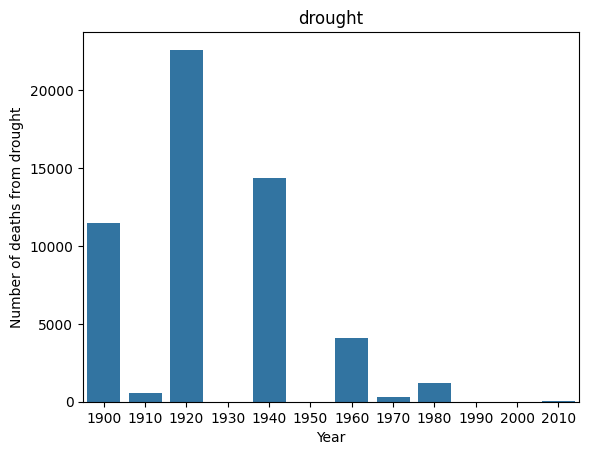

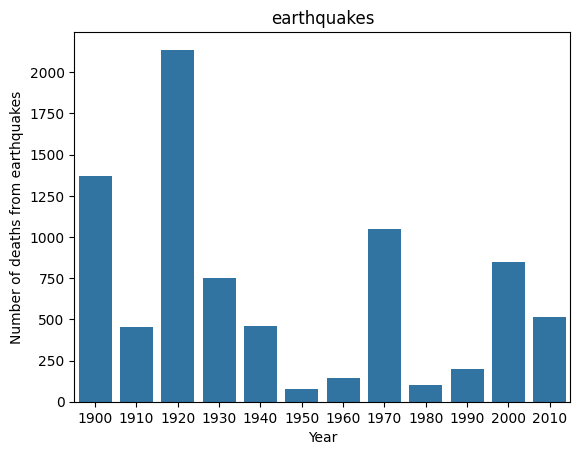

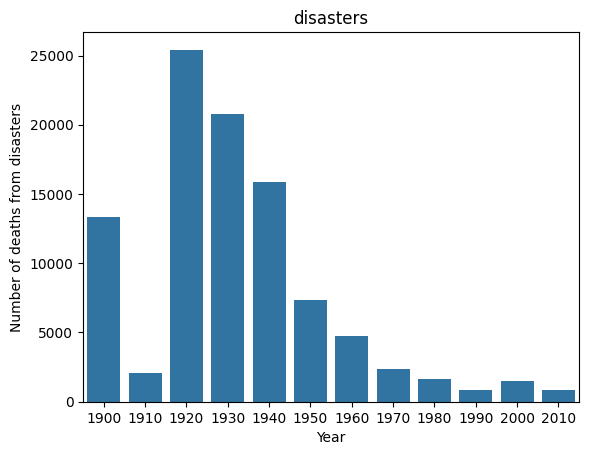

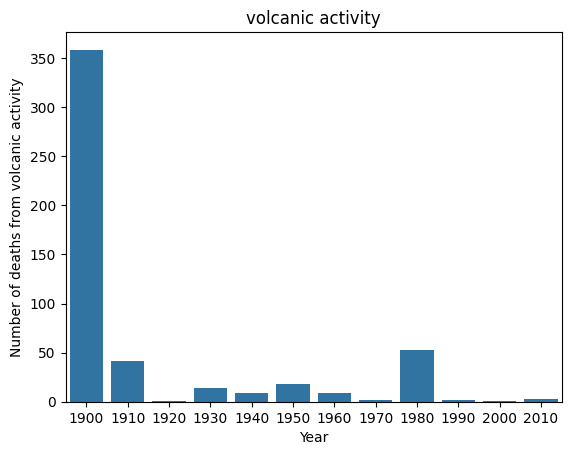

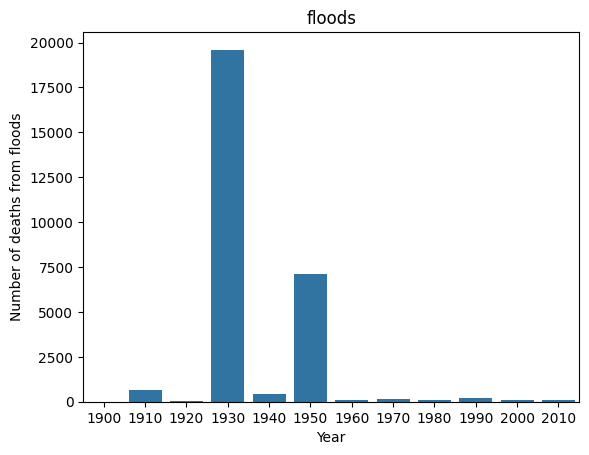

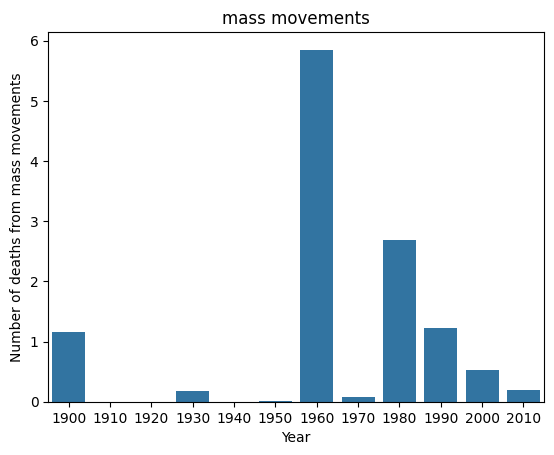

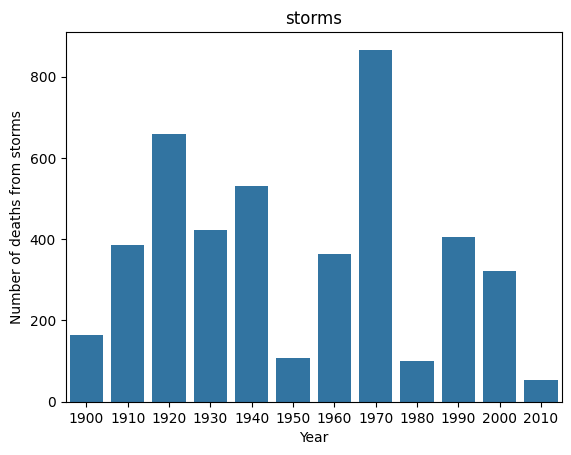

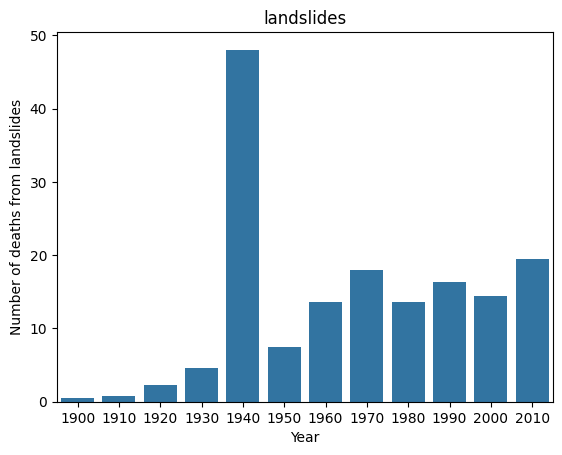

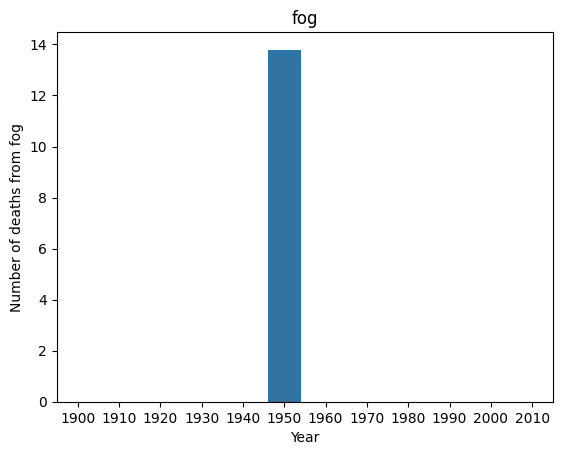

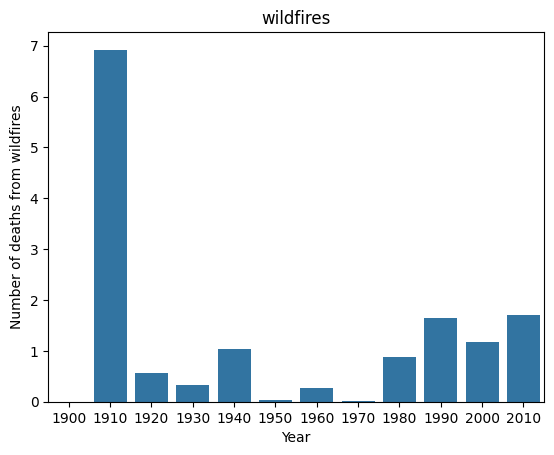

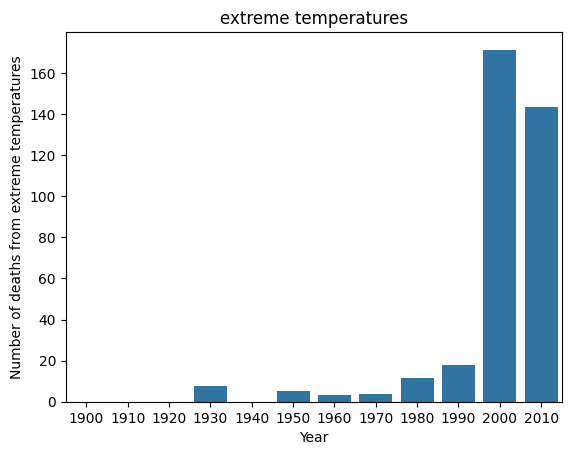

<Figure size 640x480 with 0 Axes>

In [ ]:
from ipywidgets import interact, widgets

def displayDisasterActions(action):
    for disaster in disasterTypes:
        if disaster != "glacial lake outbursts":

            columnName = ' '.join([action,disaster])
            ax=sns.barplot(data=df, x="Year", y=columnName, ci=None)
            ax.set_title(disaster)
            plt.figure()

interact(displayDisasterActions,
         action=widgets.Dropdown(
            options=disasterActions,
            value=disasterActions[0],
            description='Disaster Action:',
            disabled=False,
            ))

# All Deaths, group by Sum

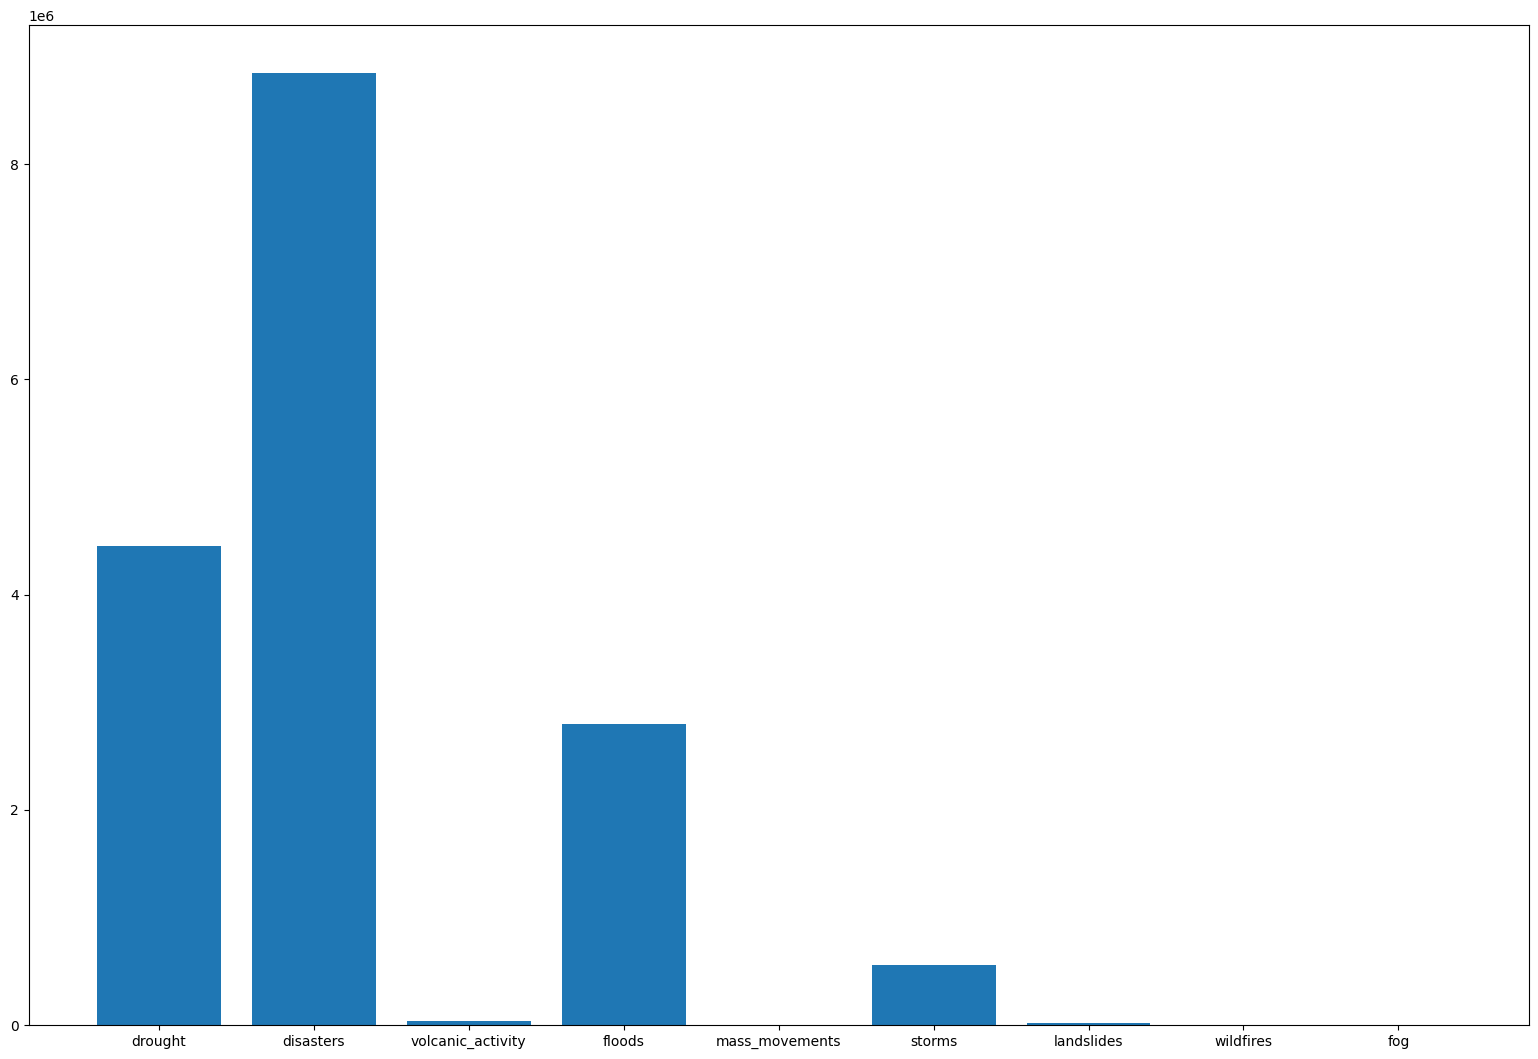

In [ ]:
deaths_drought = df_deaths_by_incident["Number of deaths from drought"].sum()
deaths_disasters = df_deaths_by_incident["Number of deaths from disasters"].sum()
deaths_volcanic_activity = df_deaths_by_incident["Number of deaths from volcanic activity"].sum()
deaths_floods = df_deaths_by_incident["Number of deaths from floods"].sum()
deaths_mass_movements = df_deaths_by_incident["Number of deaths from mass movements"].sum()
deaths_storms = df_deaths_by_incident["Number of deaths from storms"].sum()
deaths_landslides = df_deaths_by_incident["Number of deaths from landslides"].sum()
deaths_wildfires = df_deaths_by_incident["Number of deaths from wildfires"].sum()
deaths_fog = df_deaths_by_incident["Number of deaths from fog"].sum()
df_total_deaths = pd.DataFrame(
    {"Disasters" : ["drought", "disasters", "volcanic_activity", "floods", "mass_movements", "storms", "landslides", "wildfires", "fog"],
     "Deaths" : [deaths_drought, deaths_disasters, deaths_volcanic_activity, deaths_floods, deaths_mass_movements, deaths_storms, deaths_landslides, deaths_wildfires, deaths_fog]
    }
)


fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_total_deaths["Disasters"],df_total_deaths["Deaths"])
plt.show()

### little test for the getAllDisasteryByYear

In [ ]:

countriesDisasters = getAllDisastersForCountry(['Austria'])
getAllDisastersByYear(countriesDisasters, 2010)

,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,...,Total economic damages from landslides as a share of GDP,Total economic damages from mass movements as a share of GDP,Total economic damages from storms as a share of GDP,Total economic damages from volcanic activity as a share of GDP,Total economic damages from volcanic activity as a share of GDP.1,Entity,Year,deaths_rate_per_100k_storm,injured_rate_per_100k_storm,total_affected_rate_per_100k_all_disasters
115,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000029,0.0,0.0,Austria,2010,0.017953,0.136054,0.607904


### compare 2 countries with a action+disaster

In [ ]:
from ipywidgets import interact, widgets
import urllib
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

def displayComparison(country_one, country_two,disasterName,actionName,year):
    targetColumn = " ".join([actionName, disasterName])
    try:
        countriesDisasters = getAllDisastersForCountry([country_one, country_two])
        countriesYearDisasters=getAllDisastersByYear(countriesDisasters,year)
        sns.barplot(data=countriesYearDisasters, x="Entity",y=targetColumn)
        plt.show()
    except Exception as e:
        print(e)


print(getYears())
interact(displayComparison,
         country_one=getCountries(),
         country_two=getCountries(),
         disasterName=widgets.Dropdown(
            options=disasterTypes,
            value='wildfires',
            description='Disaster Type:',
            disabled=False,
            ),
         actionName=widgets.Dropdown(
            options=disasterActions,
            value=disasterActions[0],
            description='Disaster Action:',
            disabled=False,
            ),
         year=widgets.IntSlider(min=getYears()[0], max=getYears()[-1], step=10, value=getYears()[-1]))

[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]


interactive(children=(Dropdown(description='country_one', options=('Afghanistan', 'Africa', 'Albania', 'Algeri…

<function __main__.displayComparison(country_one, country_two, disasterName, actionName, year)>

### select action with disaster and display each country

In [ ]:
from ipywidgets import interact, widgets
import urllib
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

global representiveColumn
representiveColumn="deaths_rate_per_100k_storm"

def displayComparison(year, charRange, minValue, disasterName,actionName):
    representiveColumn=" ".join([actionName,disasterName])
    countries = getCountries()
    print(charRange)
    print(minValue)
    try:
        countriesDisasters = getAllDisastersForCountry(countries)
        countriesYearDisasters=getAllDisastersByYear(countriesDisasters,year)

        countriesYearDisasters = countriesYearDisasters.drop(countriesYearDisasters.loc
              [
                  (countriesYearDisasters[representiveColumn] < minValue)|
                  (countriesYearDisasters["Entity"].str[0]<chr(charRange[0]))|
                  (chr(charRange[1])<countriesYearDisasters["Entity"].str[0])
                   ]
                   .index)
        currentMax = countriesYearDisasters[representiveColumn].max()
        print("Current max: "+str(currentMax))
        plt.figure(figsize=(20,10))
        sns.set(font_scale = 1)
        sns.barplot(data=countriesYearDisasters, x="Entity",y=representiveColumn)
        plt.xticks(rotation=90)
        plt.show()
    except Exception as e:
        print("Exception: "+str(e))


valueMax=getAllDisastersForCountry(getCountries())[representiveColumn].max()

interact(displayComparison,
         year=widgets.IntSlider(min=getYears()[0], max=getYears()[-1], step=10, value=getYears()[-1]),
        charRange=widgets.IntRangeSlider(
            value=[ord('A'),ord('Z')],
            min=ord('A'),
            max=ord('Z'),
            step=1,
            description='Char-Range:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d'),
         minValue=widgets.FloatSlider(
            value=0,
            min=0,
            max=valueMax,
            step=0.1,
            description='Min Value: ',
            disabled=False,
            continuous_update=False,
            orientation='vertical',
            readout=True,
            readout_format='.1f'),
         disasterName=widgets.Dropdown(
            options=disasterTypes,
            value='wildfires',
            description='Disaster Type:',
            disabled=False,
            ),

         actionName=widgets.Dropdown(
            options=disasterActions,
            value=disasterActions[0],
            description='Disaster Action:',
            disabled=False,
            )
        )

interactive(children=(IntSlider(value=2010, description='year', max=2010, min=1900, step=10), IntRangeSlider(v…

<function __main__.displayComparison(year, charRange, minValue, disasterName, actionName)>

<Axes: xlabel='Entity', ylabel='deaths_rate_per_100k_storm'>

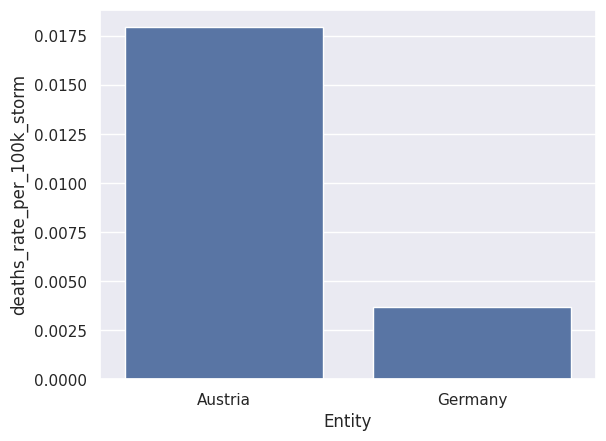

In [ ]:
countriesDisasters = getAllDisastersForCountry(['Austria', 'Germany'])
countriesYearDisasters=getAllDisastersByYear(countriesDisasters,2010)
sns.barplot(data=countriesYearDisasters, x="Entity",y="deaths_rate_per_100k_storm")


## Map Visualization
#### Number of deaths from disasters

In [ ]:
def color_producer(value, q1, q3):
    if value < q1:
        return 'green'
    elif q1 <= value <= q3:
        return 'orange'
    else:
        return 'red'

from random import seed
from random import randint
seed(1)

countryValueCoordDf = getCountriesWithCoordinates()
values=[]
targetValueColumn="Number of deaths from disasters"
year = 2010
for item in range(len(countryValueCoordDf)):
    currentCountry=countryValueCoordDf['Country'][item]
    currentValue=0
    try:
        currentValue=df.loc[(df['Entity']==currentCountry)&(df['Year']==year)][targetValueColumn].values[0]
        #print(currentCountry+": "+str(currentValue))
    except:
        #print('No Value for '+currentCountry)
        None
    values.append(currentValue)

#print("Values: "+ str(len(values)))
countryValueCoordDf["Value"]=values
#print(countryValueCoordDf)

# Create a world map to show distributions of users
import folium
from folium.plugins import MarkerCluster
import math
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
boxplot=get_box_plot_data(countryValueCoordDf['Value'])
print(boxplot)
q1 = boxplot[0.25]
q3 = boxplot[0.75]
print(q1)
print(q3)

#print("Min: "+ str(minValue)+" , Max: "+str(maxValue))
for i in range(len(countryValueCoordDf)):
        lat = countryValueCoordDf.iloc[i]['Latitude']
        long = countryValueCoordDf.iloc[i]['Longitude']
        radius=5
        currentValue = countryValueCoordDf.iloc[i]['Value']
        popup_text = """ <b>Country: </b> {}<br>
                     <b>Value: </b> {}<br>"""
        popup_text = popup_text.format(countryValueCoordDf.iloc[i]['Country'],
                                   currentValue)

        currentColor = color_producer(currentValue, q1, q3)
        #print(str(currentValue) + ": "+ str(currentColor))
        if not math.isnan(lat) and not math.isnan(long):
            folium.CircleMarker(location = [lat, long],
                                radius=radius,
                                popup=popup_text,
                                fill=True,
                                color=currentColor).add_to(marker_cluster)
#show the map
world_map

0.25     0.40
0.50     5.25
0.75    40.20
Name: Value, dtype: float64
0.4
40.2


interactive(children=(IntSlider(value=2010, description='year', max=2010, min=1900, step=10), Dropdown(descrip…

<function __main__.displayPie(year, disaster)>

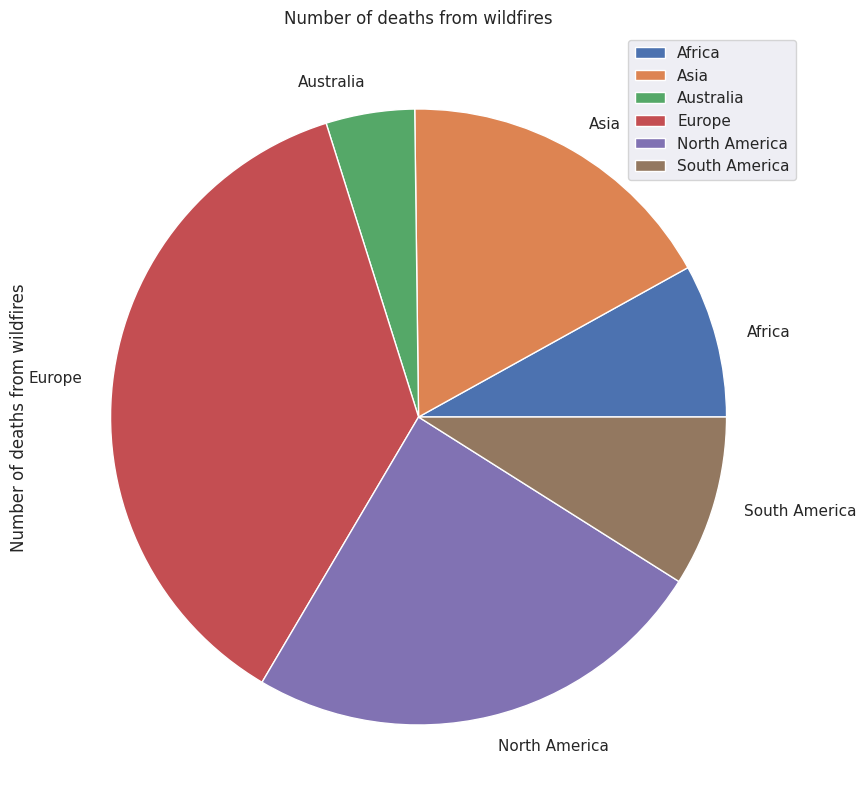

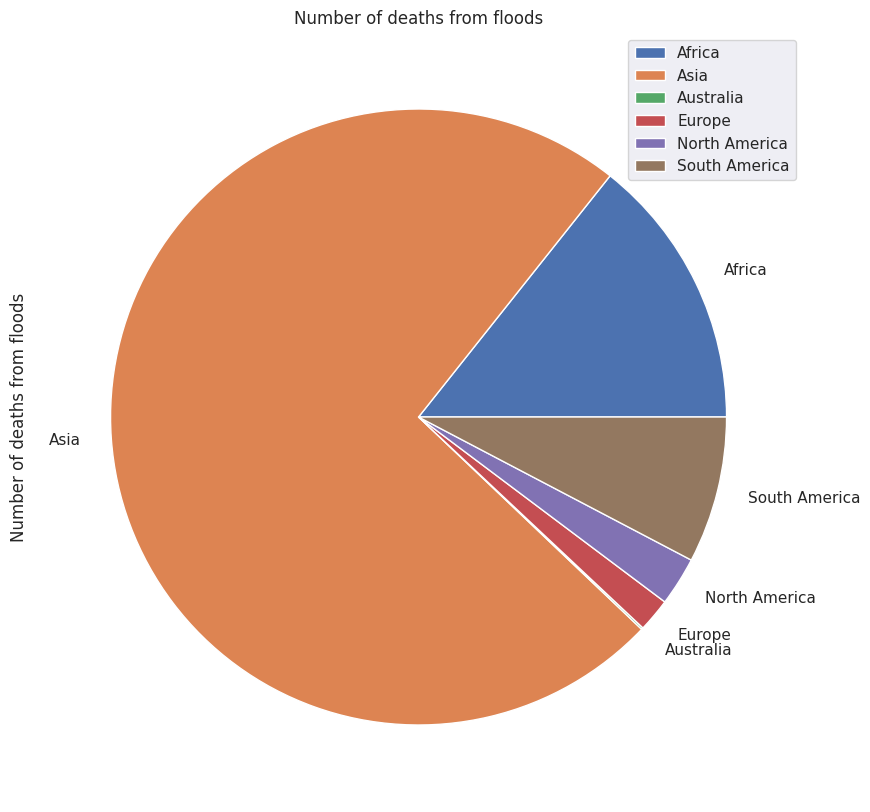

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
# sample data
def displayPie(year, disaster):
    disasterColumn = "Number of deaths from "+disaster
    pieDf = pd.read_csv('preparedData.csv')
    #print(pieDf)
    try:
        pieDf=getAllDisastersForCountryAndYear(pieDf,['Australia','Europe','Asia','Africa','South America','North America'], year)
        pieDf.groupby(['Entity']).sum().plot(kind='pie', y=disasterColumn, title=disasterColumn, figsize=(20,10))
    except:
        print("Keine Daten vorhanden!")

interact(displayPie,
         disaster=widgets.Dropdown(
            options=disasterTypes,
            value='wildfires',
            description='Disaster Type:',
            disabled=False,
            ),
         year=widgets.IntSlider(min=getYears()[0], max=getYears()[-1], step=10, value=getYears()[-1]))


## HeatMap

     Unnamed: 0         Country   Longitude   Latitude    Value
0             0     Afghanistan   66.238514  33.768006    263.1
1             1          Africa   17.757812  11.502434   3283.3
2             2         Albania  -75.892043   1.231526      6.6
3             3         Algeria    2.999983  28.000027     11.1
4             4  American Samoa -170.713148 -14.297124      0.0
..          ...             ...         ...        ...      ...
221         221           World  168.661112 -45.033025  45260.2
222         222           Yemen   47.891527  16.347124     25.3
223         223      Yugoslavia  -81.526142  23.041237      0.0
224         224          Zambia   27.558988 -14.518912      1.3
225         225        Zimbabwe   29.746841 -18.455496    108.5

[226 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


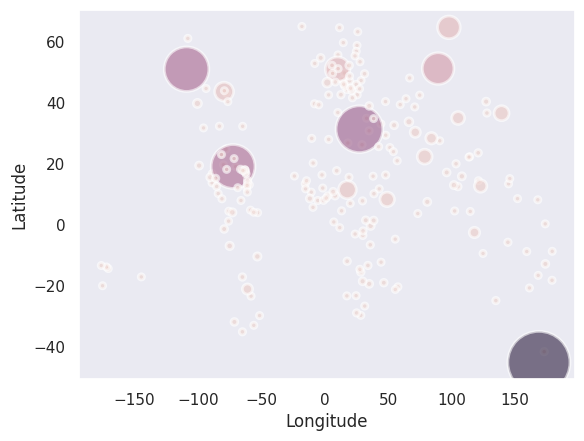

In [ ]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
#from gapminder import gapminder # data set

# data
sns.set_style("dark")

data = countryValueCoordDf
print(data)
# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x="Longitude", y="Latitude", size="Value", legend=False, sizes=(20, 2000),cmap="Accent",
    alpha=0.6,
    edgecolors="white",
    linewidth=2,
               color="red",
               hue="Value")

# show the graph
plt.show()

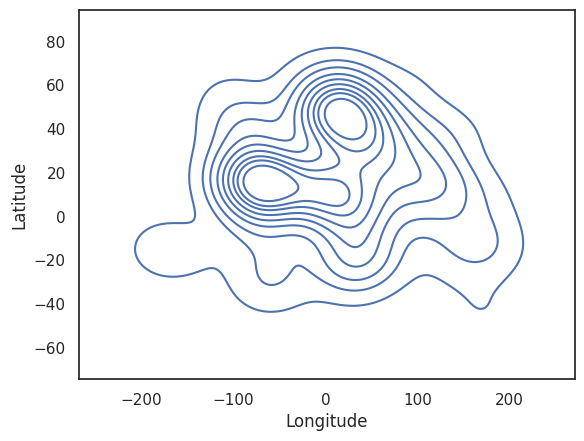

<ipython-input-31-55be2ab87e52>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df.Longitude, y=df.Latitude, cmap="Reds", shade=True, bw_adjust=.5)


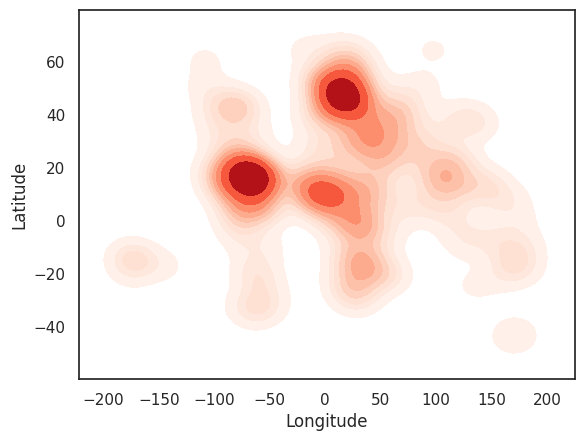

<ipython-input-31-55be2ab87e52>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df.Longitude, y=df.Latitude, cmap="Blues", shade=True, thresh=0)


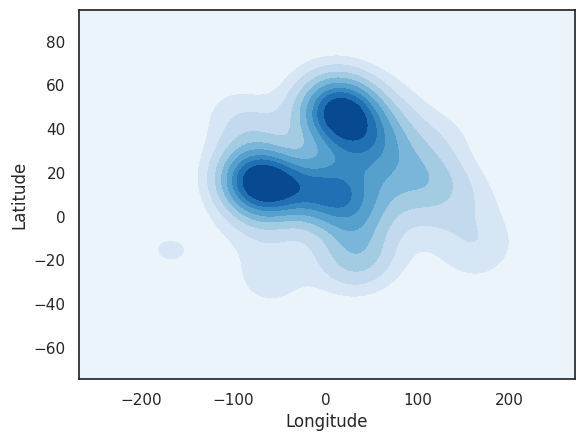

In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = countryValueCoordDf

# set seaborn style
sns.set_style("white")

# Basic 2D density plot
sns.kdeplot(x=df.Longitude, y=df.Latitude)
plt.show()

# Custom the color, add shade and bandwidth
sns.kdeplot(x=df.Longitude, y=df.Latitude, cmap="Reds", shade=True, bw_adjust=.5)
plt.show()

# Add thresh parameter
sns.kdeplot(x=df.Longitude, y=df.Latitude, cmap="Blues", shade=True, thresh=0)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

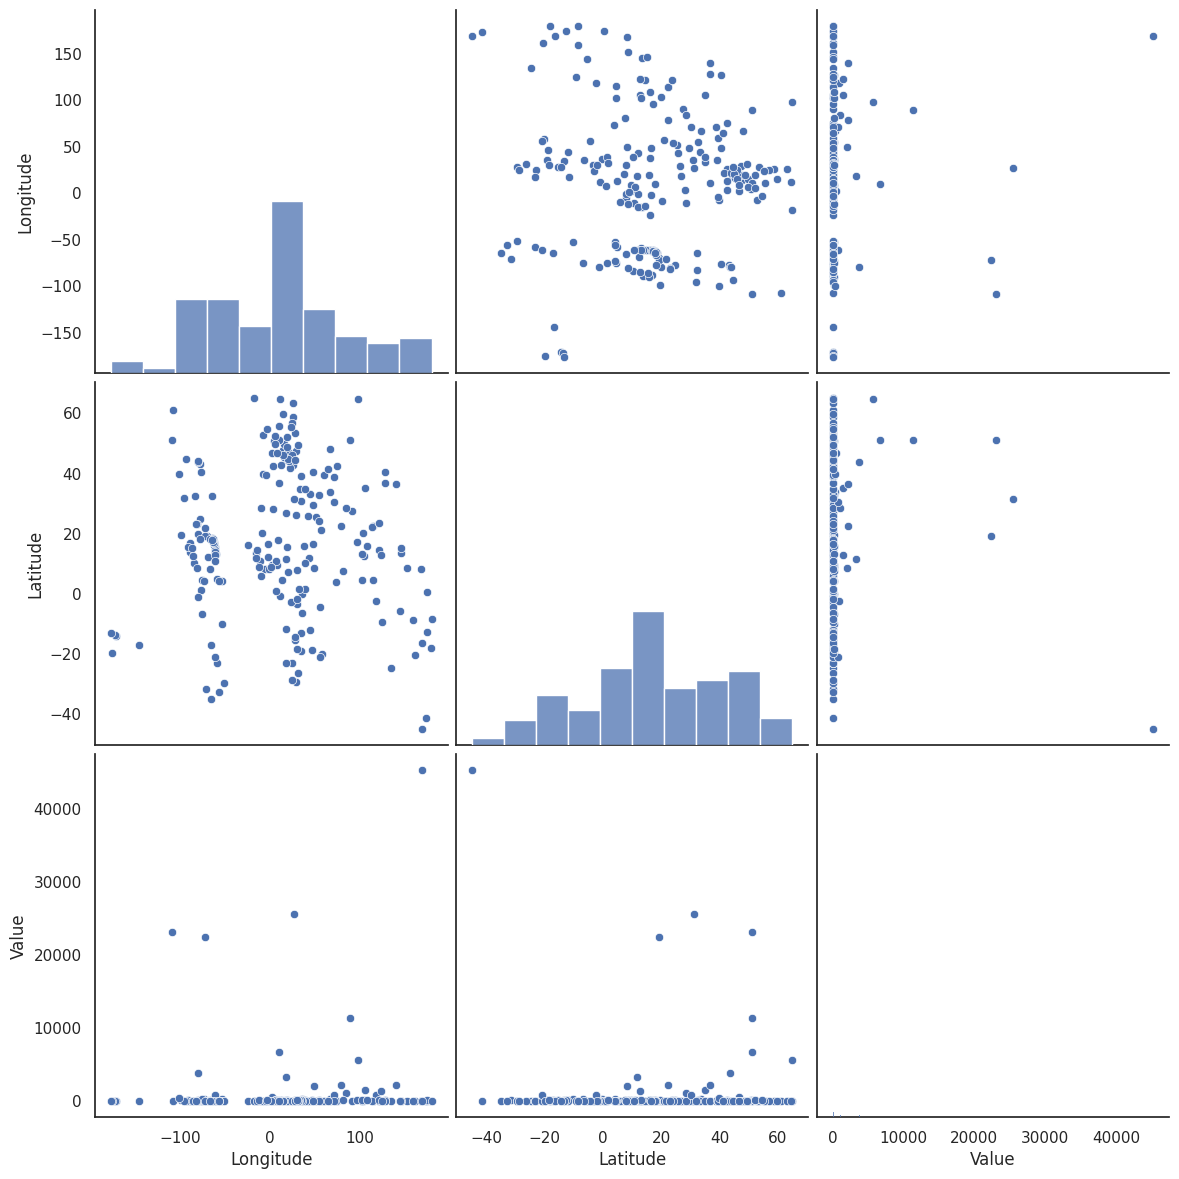

In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = countryValueCoordDf


plot = sns.pairplot(df[['Longitude','Latitude','Value']], height=4.0)
plt.show